C:\Users\kk980\AppData\Local\Temp\ipykernel_81000\3119939559.py:38: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  plt.tight_layout()
C:\Users\kk980\AppData\Local\Temp\ipykernel_81000\3119939559.py:38: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
C:\Users\kk980\AppData\Local\Temp\ipykernel_81000\3119939559.py:38: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  plt.tight_layout()
C:\Users\kk980\AppData\Local\Temp\ipykernel_81000\3119939559.py:38: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\kk980\AppData\Local\Temp\ipykernel_81000\3119939559.py:38: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  plt.tight_layout()
C:\Users\kk980\AppData\Local\Temp\ipykernel_81000\3119939559.py:38: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  plt.tight_layout()


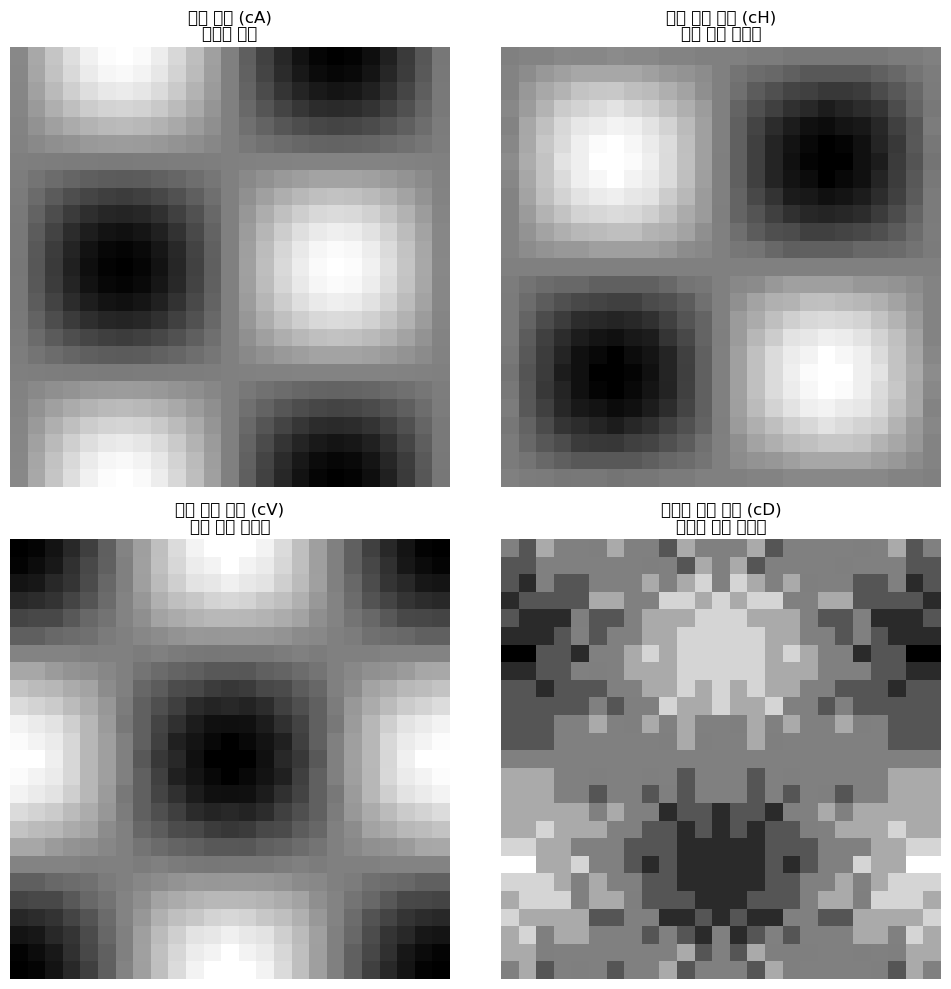


각 계수의 크기:
근사 계수 (cA) 크기: (25, 25)
수평 상세 계수 (cH) 크기: (25, 25)
수직 상세 계수 (cV) 크기: (25, 25)
대각선 상세 계수 (cD) 크기: (25, 25)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from PIL import Image
import os 
def visualize_2d_wavelet_components(image_path):
    # 이미지 로드
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)
    
    # 웨이블렛 변환 수행
    coeffs = pywt.wavedec2(img_array, 'db1', level=1)
    cA, (cH, cV, cD) = coeffs
    
    # 시각화
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    
    # 근사 계수
    axes[0, 0].imshow(cA, cmap='gray')
    axes[0, 0].set_title('근사 계수 (cA)\n저주파 성분')
    axes[0, 0].axis('off')
    
    # 수평 상세 계수
    axes[0, 1].imshow(cH, cmap='gray')
    axes[0, 1].set_title('수평 상세 계수 (cH)\n수평 방향 고주파')
    axes[0, 1].axis('off')
    
    # 수직 상세 계수
    axes[1, 0].imshow(cV, cmap='gray')
    axes[1, 0].set_title('수직 상세 계수 (cV)\n수직 방향 고주파')
    axes[1, 0].axis('off')
    
    # 대각선 상세 계수
    axes[1, 1].imshow(cD, cmap='gray')
    axes[1, 1].set_title('대각선 상세 계수 (cD)\n대각선 방향 고주파')
    axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 각 계수의 크기 출력
    print("\n각 계수의 크기:")
    print(f"근사 계수 (cA) 크기: {cA.shape}")
    print(f"수평 상세 계수 (cH) 크기: {cH.shape}")
    print(f"수직 상세 계수 (cV) 크기: {cV.shape}")
    print(f"대각선 상세 계수 (cD) 크기: {cD.shape}")

# 이미지 파일 찾기 및 처리
image_files = [f for f in os.listdir('saved_patterns') if f.endswith(('.png', '.jpg', '.jpeg'))]
if image_files:
    image_path = os.path.join('saved_patterns', image_files[0])
    visualize_2d_wavelet_components(image_path)

In [3]:
import numpy as np

# 가짜 칩 토폴로지: 약간의 곡률 + 중앙 결함 돌기
np.random.seed(42)
n_points = 10000
x = np.random.uniform(0, 10, n_points)
y = np.random.uniform(0, 10, n_points)

# 기본 면: 완만한 경사 + 잡음
z = 0.05 * x + 0.05 * y + np.random.normal(0, 0.02, n_points)

# 중앙에 돌기 추가 (결함)
defect_mask = (np.sqrt((x - 5)**2 + (y - 5)**2) < 1)
z[defect_mask] += 1.5 * np.exp(-((x[defect_mask] - 5)**2 + (y[defect_mask] - 5)**2))

# 저장
xyz = np.stack([x, y, z], axis=1)
np.savetxt("sample_chip.xyz", xyz, fmt="%.5f")

print("✅ sample_chip.xyz 생성 완료!")

✅ sample_chip.xyz 생성 완료!
